# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Exercise 11.1

Lesson 11 deals about Neural Networks (NN). 
In order to make practice I studied how the results of the linear fit of point noisily distributed around: 

$$
f(x)=2x+1
$$ 

depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$.

In [40]:
# Target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# Generate training inputs
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)

y_train_mean = m * x_train + b
y_valid_mean = m * x_valid + b

# Compose the NN model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


I produce three different train and validation sets starting from different values of the noise sigma. 
I then study how the validation loss change with  $N_{\mathrm{epochs}}$ and $N_{\mathrm{train}}$.

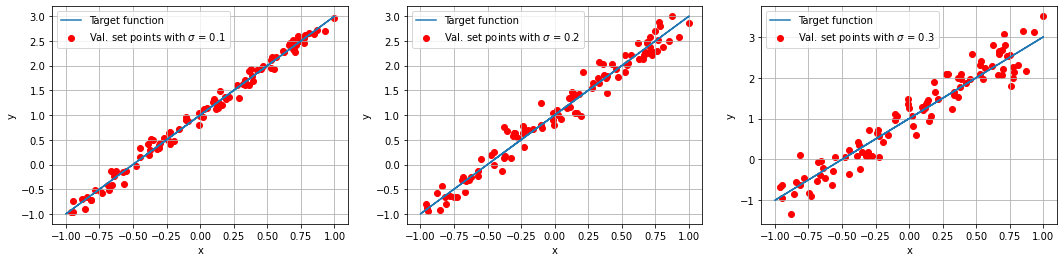

In [41]:
sigmas = [0.1, 0.2, 0.3] # noise standard deviation

plt.figure(1, figsize = (18, 4))
plt.subplot(1, 3, 1)
y_train = np.random.normal(y_train_mean, sigmas[0]) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(y_valid_mean, sigmas[0])
plt.plot(x_train, y_train_mean, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigmas[0]))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True) 

plt.subplot(1, 3, 2)
y_train = np.random.normal(y_train_mean, sigmas[1]) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(y_valid_mean, sigmas[1])
plt.plot(x_train, y_train_mean, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigmas[1]))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
y_train = np.random.normal(y_train_mean, sigmas[2]) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(y_valid_mean, sigmas[2])
plt.plot(x_train, y_train_mean, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigmas[2]))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.show()

/home/esgaroth/.local/envs/miniconda3/envs/lab-galli/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


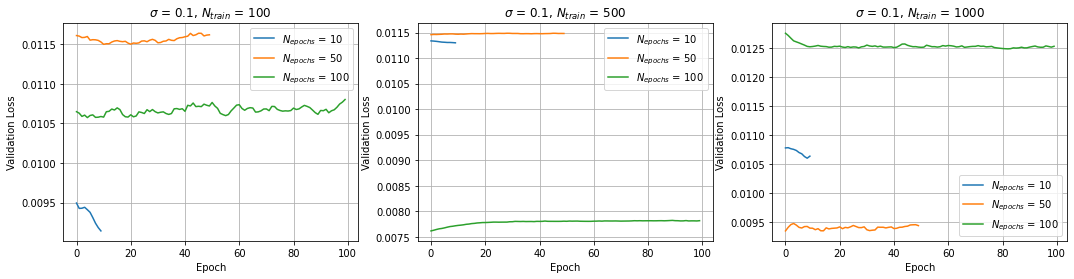

Best validation-loss found for sigma = 0.1 : N_train = 500 , N_epochs = 100


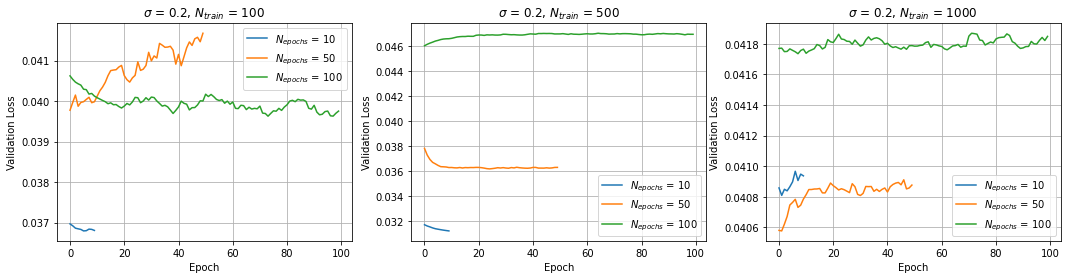

Best validation-loss found for sigma = 0.2 : N_train = 500 , N_epochs = 10


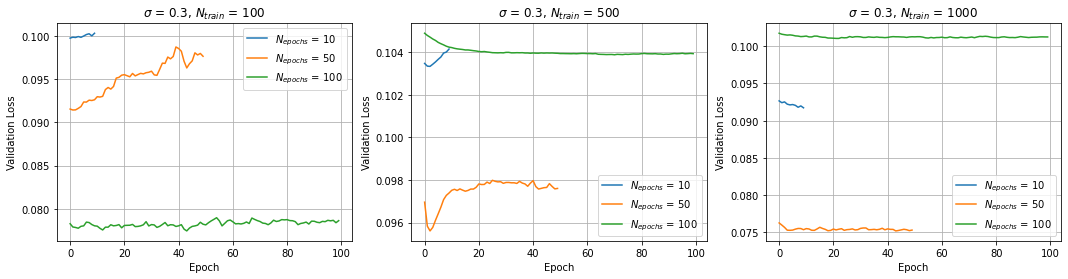

Best validation-loss found for sigma = 0.3 : N_train = 1000 , N_epochs = 50


In [31]:
Ns_epochs = [10, 50, 100]
Ns_train = [100, 500, 1000]

best_loss = 1e100 # very high value

index_p = 1
for sigma in sigmas:
    for N_epochs in Ns_epochs:
        index_sp = 1
        for N_train in Ns_train:
            
            y_train = np.random.normal(y_train_mean, sigma) # actual measures from which we want to guess regression parameters
            y_valid = np.random.normal(y_valid_mean, sigma)

            history = model.fit(x=x_train[:N_train], y=y_train[:N_train], 
                                batch_size=32, epochs=N_epochs ,shuffle=True, 
                                validation_data=(x_valid, y_valid), verbose=0)            
            # Plot loss
            plt.figure(index_p, figsize = (18, 4))
            
            plt.subplot(1, 3, index_sp)
            #plt.plot(history.history['loss'], label="train-loss, $N_{epochs}$ = "
            #         +str(N_epochs))
            plt.plot(history.history['val_loss'], label="$N_{epochs}$ = "
                     +str(N_epochs))
            plt.title("$\sigma$ = "+str(sigma)+", $N_{train}$ = "+str(N_train))
            plt.ylabel('Validation Loss')
            plt.xlabel('Epoch')
            plt.legend()
            plt.grid(True)
            index_sp = index_sp + 1

            # Save best N_epochs, N_train
            if( history.history['val_loss'][-1] < best_loss ):
                best_loss=history.history['val_loss'][-1]
                best_N_epochs, best_N_train = N_epochs, N_train
                
    plt.show()
    print("Best validation-loss found for sigma =", sigma, 
          ": N_train =", best_N_train,", N_epochs =", best_N_epochs, )
    best_loss = 1e100 
    index_p = index_p + 1

As we can see, increasing the noise in the training set requires a larger training set and more training epochs to get smaller values of the validation loss.
In certain cases we can observe that a smaller value for $N_{epochs}$ results in a smaller value of the validation-loss: in this cases is possible that with higher values of $N_{epochs}$ the NN tends to suffer of overfitting.

### Exercise 11.2

I extended the model to obtain a reasonable fit of the polynomial:

$$
f(x)=4-3x-2x^2+3x^3
$$

for $x \in [-1,1]$.

In order to make practice with NN I tried to modify first the number of layers and the number of neurons in each layer and observed the results to see what could be a good choice.

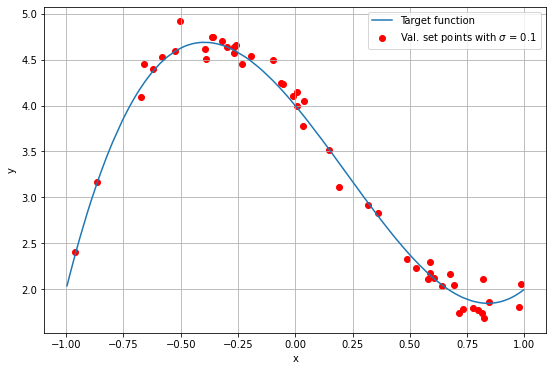

In [64]:
# Generate point to plot target function
x_target = np.random.uniform(-1, 1, 200)
x_target.sort() # sorting to plot target function
y_target = 4. - 3.*x_target - 2.*x_target**2 + 3.*x_target**3
# Generate training inputs
x_train = np.random.uniform(-1, 1, 200)
x_valid = np.random.uniform(-1, 1, 50)

y_target_train = 4. - 3.*x_train - 2.*x_train**2 + 3.*x_train**3
y_target_valid = 4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3

sigma = 0.1 # noise
y_train = np.random.normal(y_target_train, sigma)
y_valid = np.random.normal(y_target_valid, sigma)

plt.figure(1, figsize = (9, 6))
plt.plot(x_target, y_target, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigma))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True) 

plt.show()

In [44]:
# Define a function that return a model with input_shape=(1,), 'mse' metrics 
# and specific N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn
def get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn):  
    
    model = Sequential()    
    # Add input layer
    model.add(Dense(N_neurons_per_layer, activation=activ_fn, input_shape=(1,)))    
    # Add deep layers
    for i in range(1, N_layers-1):
        model.add(Dense(N_neurons_per_layer, activation=activ_fn))        
    # Add output layer
    model.add(Dense(1, activation=activ_fn))
    
    model.compile(loss=loss_fn, optimizer=optim, metrics=['mse'])

    return model

Computing NN with : N_layers =  5 , N_neurons_per_layer =  10


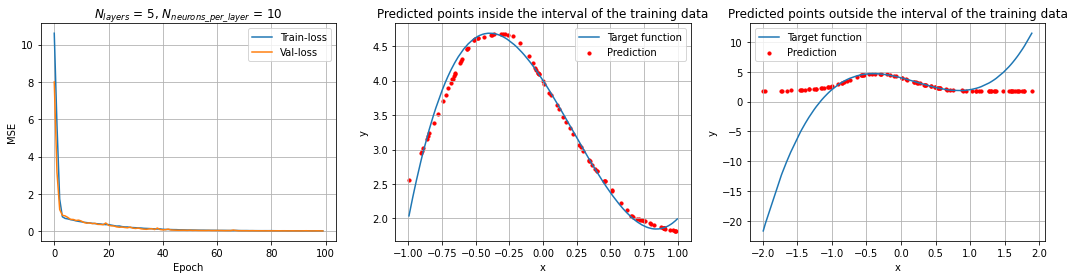

Computing NN with : N_layers =  5 , N_neurons_per_layer =  20


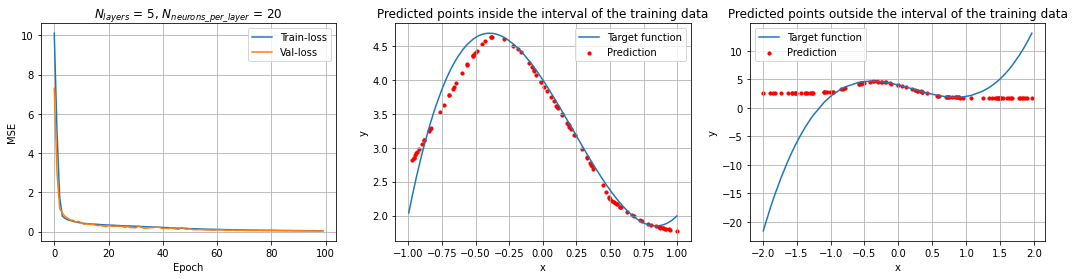

Computing NN with : N_layers =  5 , N_neurons_per_layer =  30


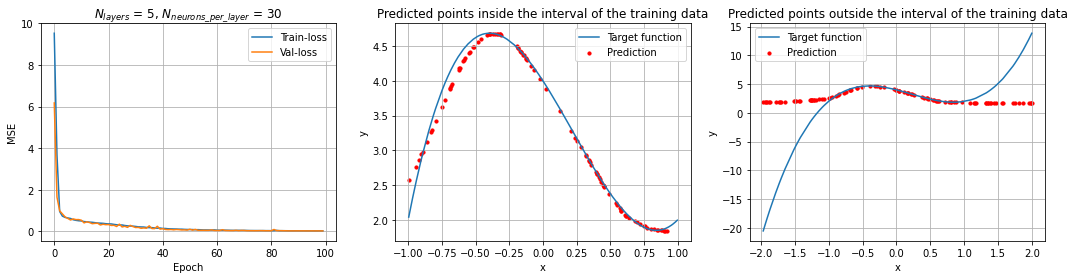

Computing NN with : N_layers =  5 , N_neurons_per_layer =  40


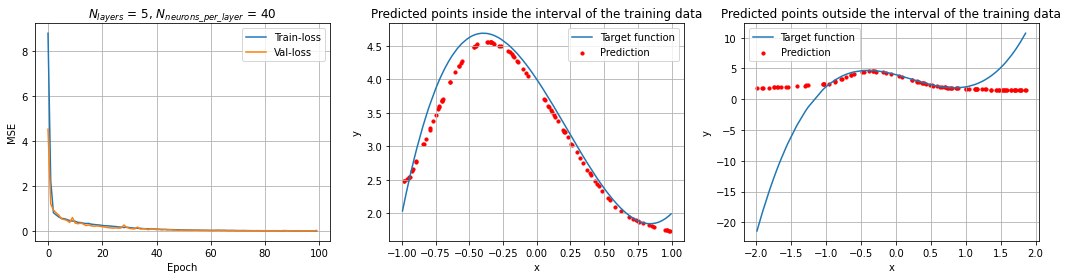

Computing NN with : N_layers =  10 , N_neurons_per_layer =  10


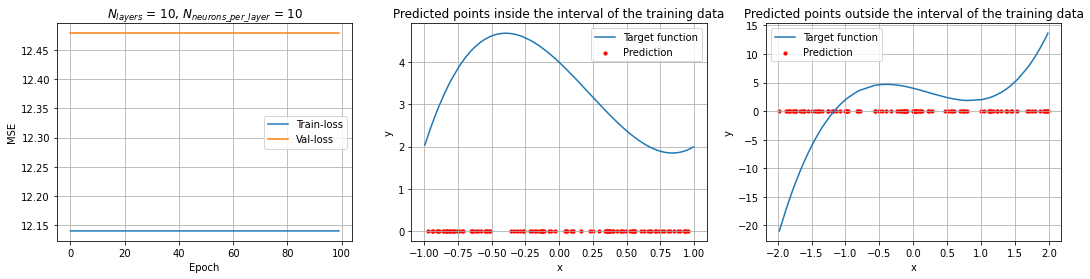

Computing NN with : N_layers =  10 , N_neurons_per_layer =  20


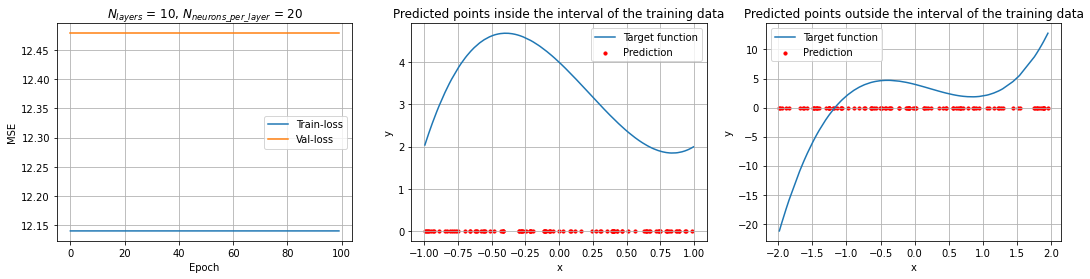

Computing NN with : N_layers =  10 , N_neurons_per_layer =  30


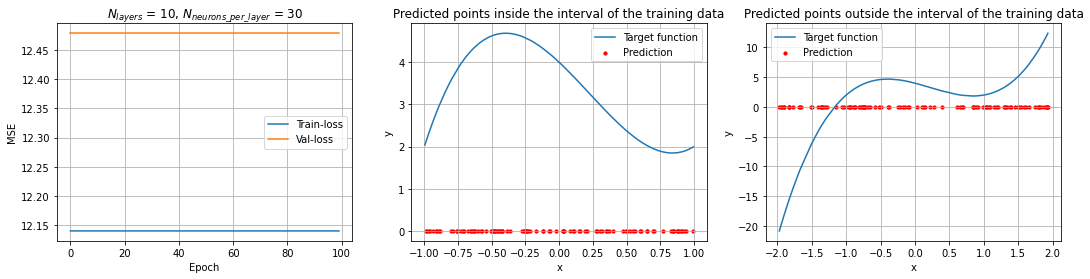

Computing NN with : N_layers =  10 , N_neurons_per_layer =  40


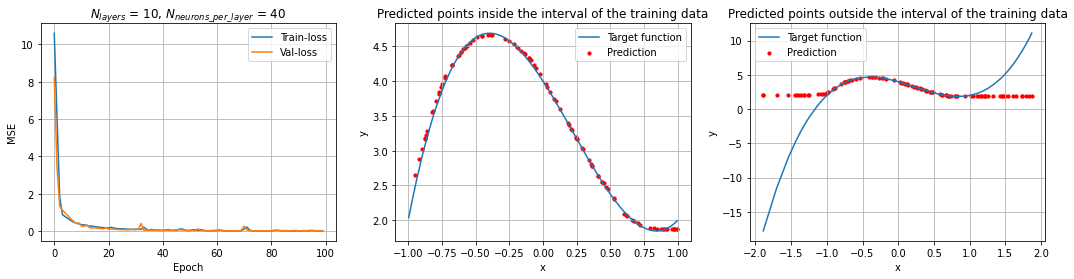

Computing NN with : N_layers =  20 , N_neurons_per_layer =  10


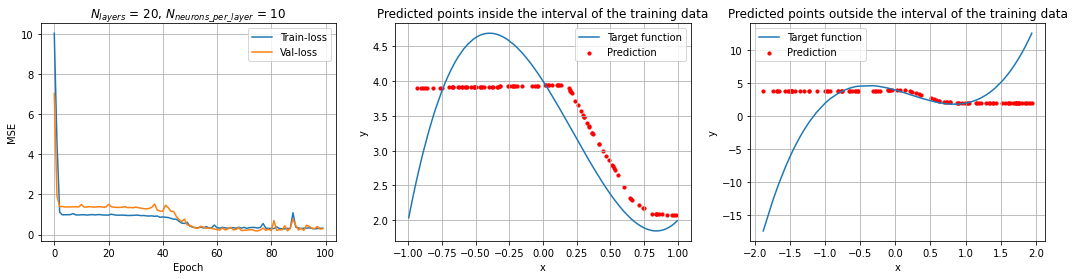

Computing NN with : N_layers =  20 , N_neurons_per_layer =  20


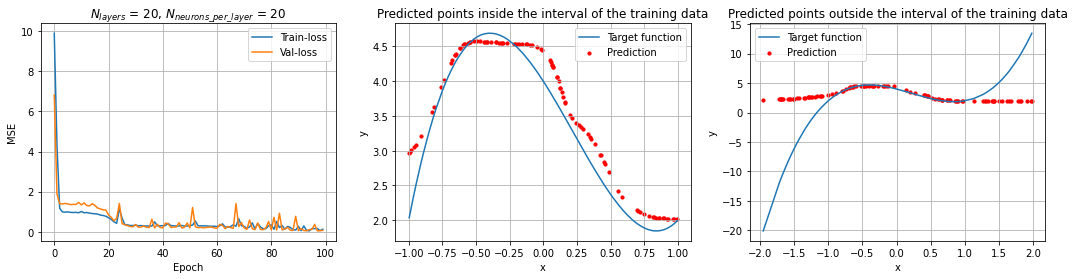

Computing NN with : N_layers =  20 , N_neurons_per_layer =  30


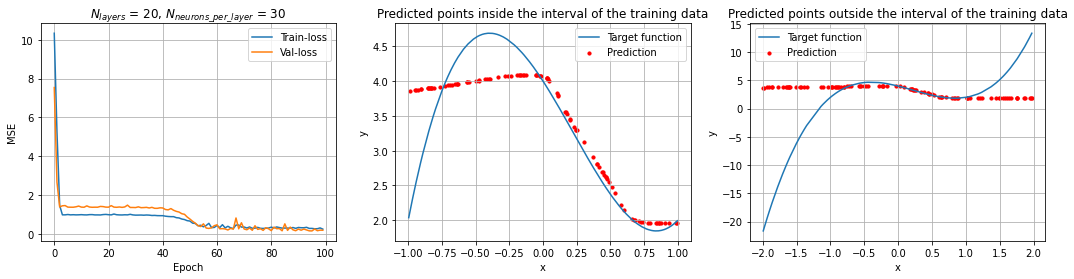

Computing NN with : N_layers =  20 , N_neurons_per_layer =  40


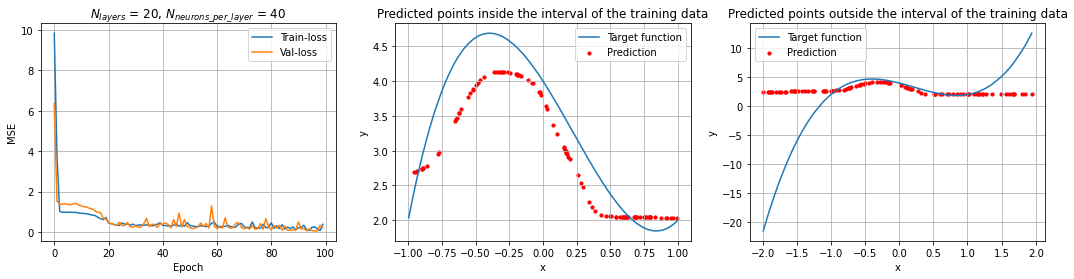

In [71]:
activ_fn = 'relu'
optim = 'sgd'
loss_fn = 'mse'
nepochs = 100

Ns_layers=[5,10,20]
Ns_neurons_per_layer=[10,20,30,40]

index = 1
for N_layers in Ns_layers:
    for N_neurons_per_layer in Ns_neurons_per_layer:
        
        print("Computing NN with : N_layers = ", N_layers,", N_neurons_per_layer = ",N_neurons_per_layer)
        plt.figure(index, figsize = (18, 4))
        
        model = get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)
        #model.summary()
        history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = nepochs, 
                            shuffle = True, validation_data = (x_valid, y_valid), verbose=0)
        # Plot training & validation loss values
        plt.subplot(1, 3, 1)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title("$N_{layers}$ = "+str(N_layers)+", $N_{neurons\_per\_layer}$ = "+str(N_neurons_per_layer))
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Train-loss', 'Val-loss'], loc='best')
        plt.grid(True)
        # Plot prediction on points inside the interval of the training data
        plt.subplot(1, 3, 2)
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r', s=10, label="Prediction")
        plt.plot(x_target, y_target, label="Target function")
        plt.title("Predicted points inside the interval of the training data")
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
        plt.legend()
        # Plot prediction on points outside the interval of the training data
        plt.subplot(1, 3, 3)
        x_test = np.random.uniform(-2, 2, 100)
        y_test = np.random.normal(4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3, sigma)
        x_test.sort() #sorting to plot target function
        y_test_target = 4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3

        y_predicted = model.predict(x_test)
        
        plt.scatter(x_test, y_predicted,color='r', s=10, label="Prediction")
        plt.plot(x_test, y_test_target, label="Target function")
        plt.title("Predicted points outside the interval of the training data")
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
        plt.legend()
       
        plt.show()
        
        index = index + 1

I then tried again modifying other parameters like the activation function, the optimizer and the loss function usign parameters that seemed good in the previous run like $N_{layers}=10$ and $N_{neurons-per-layer}=40$.

Computing NN with: optim = sgd , activ_fn = relu , loss_fn = mean_squared_error


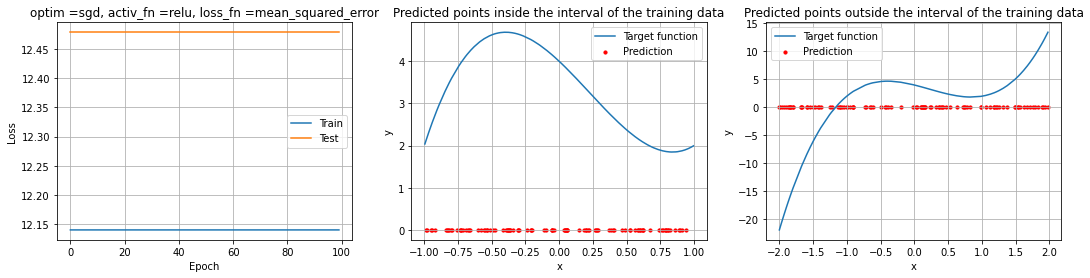

Computing NN with: optim = sgd , activ_fn = relu , loss_fn = mean_absolute_error


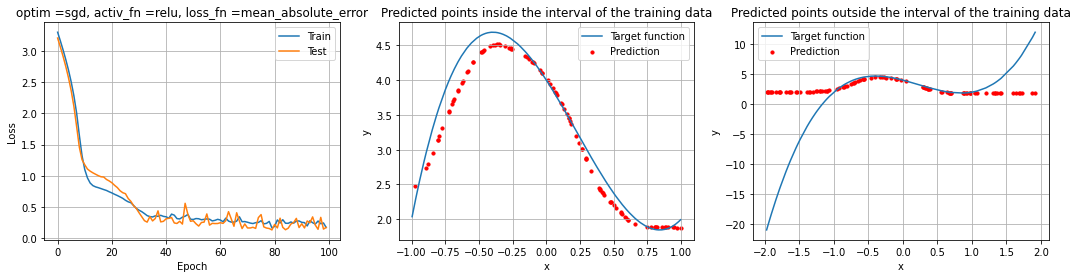

Computing NN with: optim = adam , activ_fn = relu , loss_fn = mean_squared_error


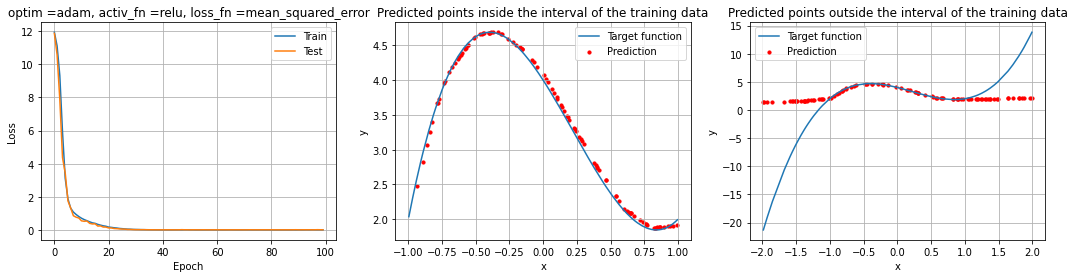

Computing NN with: optim = adam , activ_fn = relu , loss_fn = mean_absolute_error


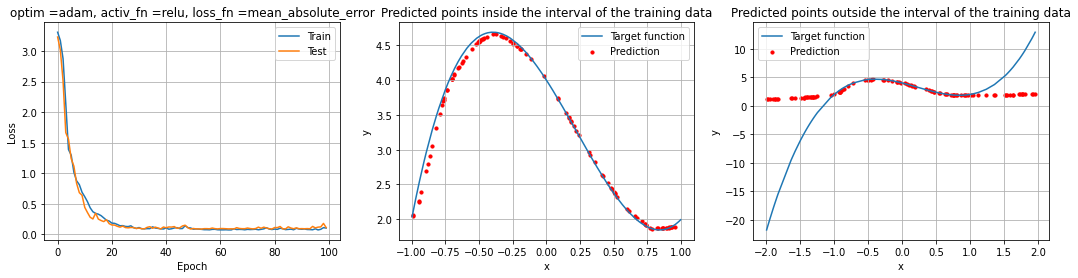

Computing NN with: optim = sgd , activ_fn = elu , loss_fn = mean_squared_error


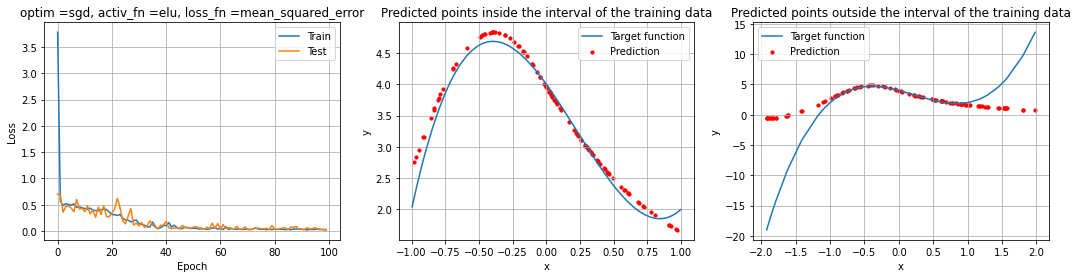

Computing NN with: optim = sgd , activ_fn = elu , loss_fn = mean_absolute_error


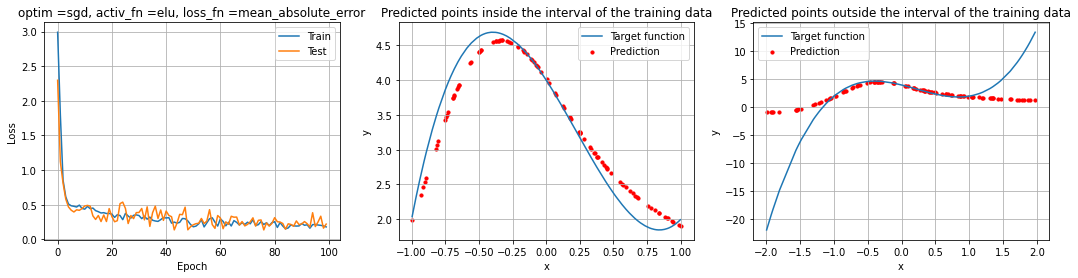

Computing NN with: optim = adam , activ_fn = elu , loss_fn = mean_squared_error


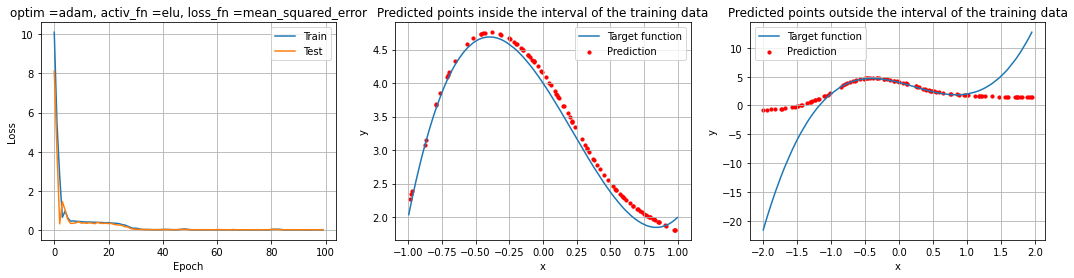

Computing NN with: optim = adam , activ_fn = elu , loss_fn = mean_absolute_error


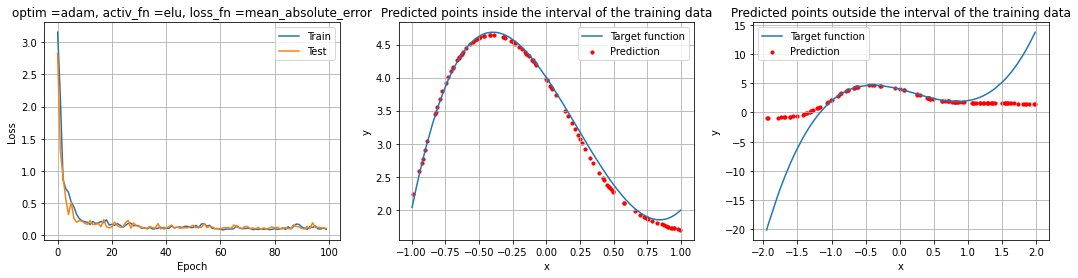

In [72]:
N_layers=10
N_neurons_per_layer=40

activ_fns=['relu', 'elu']
optims=['sgd', 'adam']
loss_fns=['mean_squared_error', 'mean_absolute_error']

index = 1
for activ_fn in activ_fns:
    for optim in optims:
        for loss_fn in loss_fns:
            print("Computing NN with: optim =", optim,", activ_fn =",activ_fn, ", loss_fn =",loss_fn)
            model = get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)
            history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=nepochs,
                                shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
            
            plt.figure(index, figsize = (18, 4))
            # Plot training & validation loss values
            plt.subplot(1, 3, 1)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title("optim ="+str(optim)+", activ_fn ="+str(activ_fn)+", loss_fn ="+str(loss_fn))
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='best')
            plt.grid(True)
            # Plot prediction on points inside the interval of the training data
            plt.subplot(1, 3, 2)
            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model.predict(x_predicted)
            plt.scatter(x_predicted, y_predicted,color='r', s=10, label="Prediction")
            plt.plot(x_target, y_target, label="Target function")
            plt.title("Predicted points inside the interval of the training data")
            plt.ylabel('y')
            plt.xlabel('x')
            plt.grid(True)
            plt.legend()
            # Plot prediction on points outside the interval of the training data
            plt.subplot(1, 3, 3)
            x_test = np.random.uniform(-2, 2, 100)
            y_test = np.random.normal(4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3, sigma)
            x_test.sort()
            y_test_target = 4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3

            y_predicted = model.predict(x_test)

            plt.scatter(x_test, y_predicted, color='r', s=10, label="Prediction")
            plt.plot(x_test, y_test_target, label="Target function")
            plt.title("Predicted points outside the interval of the training data")
            plt.ylabel('y')
            plt.xlabel('x')
            plt.grid(True)
            plt.legend()

            plt.show()
            
            index=index+1

We observe that our NNs works well, with the tuned parameters, on the points in the range of $x$ where the model was trained.
The points outside the original training data set aren't modeled correctly by any of the trained NN.

From the cases we have studied, we can observe a good prediction if the model we choose is not too simple nor too complex (speaking in terms of number of parameters) with respect to the training set size.
This is caused by the *bias-variance trade-off*: if we choose too many parameters to tune and we haven't enough training point we can get poorer results than from a simpler model.
For this reason, results obtained with $N_{layers}=5$ are poorer than those obtained with $N_{layers}=10$, probably beacuse the model obtained is too simple and we incur in *underfitting*.
On the other hand we observe that using $N_{layers} = 20$ we get worse results, sign that we are experimenting *overfitting*.

### Exercise 11.3
  
I then extended the model to fit a simple trigonometric 2D function:

$$
f(x,y) = \sin(x^2+y^2),
$$

in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [80]:
# Generate training inputs
x_train = np.random.uniform(-1.5, 1.5, 1000)
y_train =np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
y_valid = np.random.uniform(-1.5, 1.5, 500)

z_target = np.sin(x_valid**2+y_valid**2)

sigma=0.2 # set noise sigma
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

data_train=np.array([x_train, y_train]).T
data_valid=np.array([x_valid, y_valid]).T

In [77]:
# Define a function that return a model with input_shape=(2,), 'mse' metrics 
# and specific N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn
def get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn):
    
    model = keras.models.Sequential()
    
    #input layer
    model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn, input_shape=(2,)))
    
    #deep layers
    for i in range(1, N_layers-1):
        model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn))
        
    #output layer
    model.add(keras.layers.Dense(1, activation=activ_fn))
    
    model.compile(loss=loss_fn, optimizer=optim, metrics=['mse'])

    return model

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


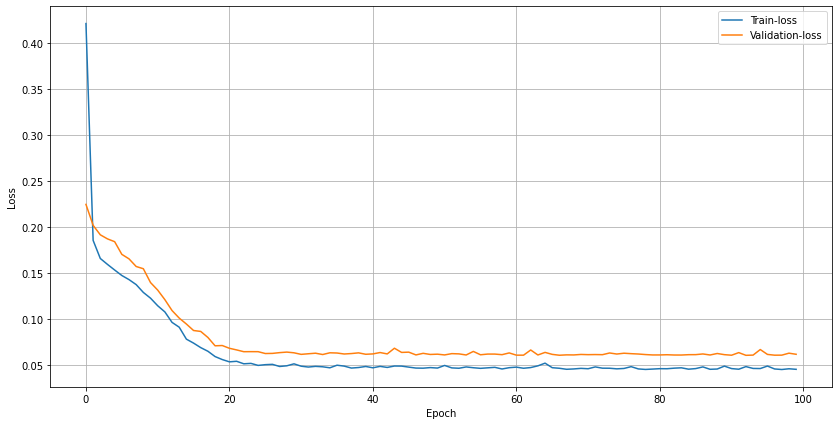

In [78]:
# Set model parameters
N_layers = 5
N_neurons_per_layer = 30
nepochs = 100
activ_fn = 'relu'
optim = 'adam'
loss_fn = 'mse'

# Construct model
model = get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)
model.summary()

# Train model
history = model.fit(x=data_train, y=z_train, batch_size=32, epochs=nepochs, 
                    shuffle=True, validation_data=(data_valid, z_valid), verbose=0)

# Plot training & validation loss values
plt.figure(figsize = (14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train-loss', 'Validation-loss'], loc='best')
plt.grid(True)

plt.show()

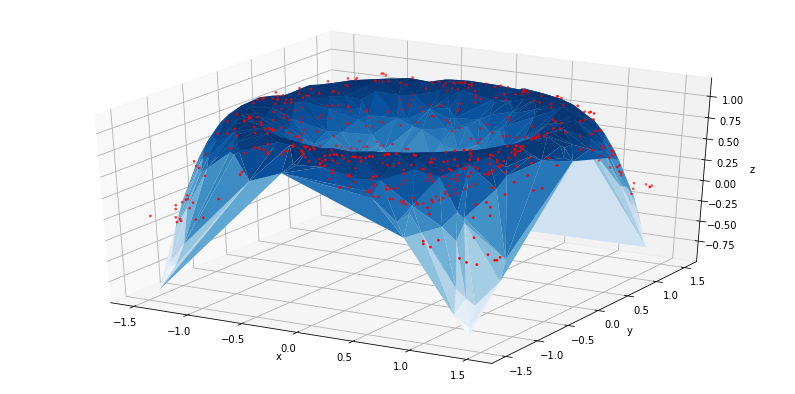

In [79]:
fig = plt.figure(figsize = (14, 7))
ax = fig.gca(projection='3d')

ax.plot_trisurf(x_valid, y_valid, z_target, linewidth=0.2, antialiased=True, cmap=cm.Blues)
x_predicted = np.random.uniform(-1.5, 1.5, 500)
y_predicted = np.random.uniform(-1.5, 1.5, 500)
data_predicted = np.array([x_predicted, y_predicted]).T
z_predicted = model.predict(data_predicted)
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

As can be seen from this last two plot I succeed in producing a model that fit the required function.